In [17]:
import json
import pprint
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# multi hot bag of bytes encoding
def path_to_vector(path):
    path_bytes = [i for i in bytes(path, 'ascii')]
    vector = [0 for i in range(256)]
    for i in path_bytes:
        vector[i] = 1
    return vector

def classifier_performance_metrics(classifier, X_test, y_test):
    y_test_pred = classifier.predict(X_test)
    matrix = confusion_matrix(y_test, y_test_pred)
    tn, fp, fn, tp = matrix.ravel()
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp )
    recall = tp / (tp + fn)
    pprint.pprint({
        "tn": tn, 
        "fp": fp, 
        "fn": fn, 
        "tp": tp
    })
    return {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall
    }

X = []
y = []

with open('data/paths-benign.txt', 'r') as f:
    for path in f.readlines():
        path = path.strip()
        X.append(path)
        y.append(0)

with open('data/paths-malicious.txt', 'r') as f:
    for path in f.readlines():
        path = path.strip()
        X.append(path)
        y.append(1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1234)


In [18]:
nn_classifier = MLPClassifier(hidden_layer_sizes=(), random_state=1234)
nn_classifier.fit([path_to_vector(x) for x in X_train], y_train)
print("Neural network:")
pprint.pprint(classifier_performance_metrics(nn_classifier, [path_to_vector(x) for x in X_test], y_test))


Neural network:
{'fn': 4, 'fp': 0, 'tn': 2844, 'tp': 11}
{'accuracy': 0.9986009094088842, 'precision': 1.0, 'recall': 0.7333333333333333}


<Axes: >

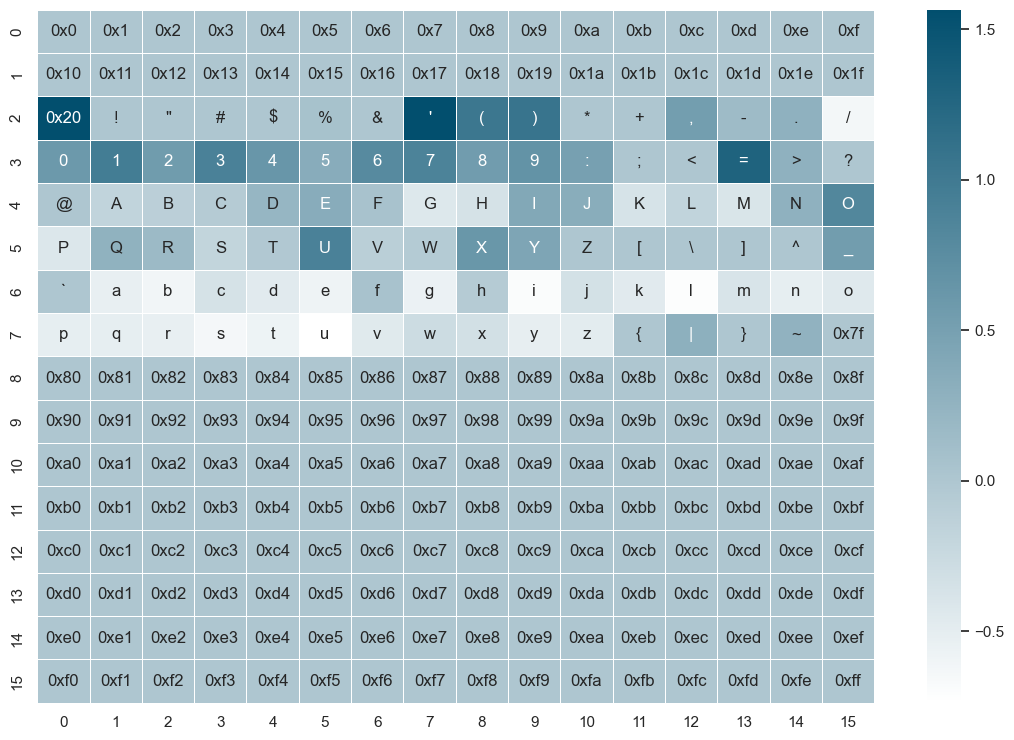

In [74]:
def render_printable(i):
    if i > 32 and i < 127:
        r = chr(i)
    else: 
        r = hex(i)
    return r

coefficients = [(render_printable(i), nn_classifier.coefs_[0][i]) for i in range(256)]

reshaped_keys = []
reshaped_values = []
for base in range(0,256,16):
    reshaped_keys.append([i[0] for i in coefficients[base:base+16]])
    reshaped_values.append([i[1][0] for i in coefficients[base:base+16]])

import matplotlib.pyplot as plt
import seaborn as sns
colors = ["#ffffff", "#024f6e"]
sns.set_theme()
my_cmap = sns.blend_palette(colors, as_cmap = True)

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(13.5, 9))
sns.heatmap(reshaped_values, annot=reshaped_keys, fmt='', linewidths=.5, ax=ax, cmap=my_cmap)


In [75]:
sorted_coefficients = sorted(coefficients, key = lambda i: -i[1])
print("Top five characters: ")
pprint.pprint(sorted_coefficients[:5])

AttributeError: 'list' object has no attribute 'write'

In [23]:
from sklearn.base import BaseEstimator, ClassifierMixin

class SpaceClassifier(BaseEstimator, ClassifierMixin):
    def predict(self, X, y=None):
        return [1 if ' ' in i else 0 for i in X]

print("Space Classifier:")
space_classifier = SpaceClassifier()
pprint.pprint(classifier_performance_metrics(space_classifier, X_test, y_test))


Space Classifier:
{'fn': 4, 'fp': 0, 'tn': 2844, 'tp': 11}
{'accuracy': 0.9986009094088842, 'precision': 1.0, 'recall': 0.7333333333333333}


In [24]:
from sklearn.base import BaseEstimator, ClassifierMixin

class QuoteClassifier(BaseEstimator, ClassifierMixin):
    def predict(self, X, y=None):
        return [1 if "'" in i else 0 for i in X]

print("Quote Classifier:")
quote_classifier = QuoteClassifier()
pprint.pprint(classifier_performance_metrics(quote_classifier, X_test, y_test))


Quote Classifier:
{'fn': 2, 'fp': 0, 'tn': 2844, 'tp': 13}
{'accuracy': 0.9993004547044421, 'precision': 1.0, 'recall': 0.8666666666666667}


In [25]:
from sklearn.base import BaseEstimator, ClassifierMixin

class EqualsClassifier(BaseEstimator, ClassifierMixin):
    def predict(self, X, y=None):
        return [1 if "=" in i else 0 for i in X]

print("Equals Classifier:")
equals_classifier = EqualsClassifier()
pprint.pprint(classifier_performance_metrics(equals_classifier, X_test, y_test))


Equals Classifier:
{'fn': 7, 'fp': 0, 'tn': 2844, 'tp': 8}
{'accuracy': 0.9975515914655474, 'precision': 1.0, 'recall': 0.5333333333333333}


In [26]:
from sklearn.base import BaseEstimator, ClassifierMixin

class LeftParenthesisClassifier(BaseEstimator, ClassifierMixin):
    def predict(self, X, y=None):
        return [1 if "(" in i else 0 for i in X]

print("LeftParenthesis Classifier:")
left_parenthesis_classifier = LeftParenthesisClassifier()
pprint.pprint(classifier_performance_metrics(left_parenthesis_classifier, X_test, y_test))


LeftParenthesis Classifier:
{'fn': 6, 'fp': 0, 'tn': 2844, 'tp': 9}
{'accuracy': 0.9979013641133263, 'precision': 1.0, 'recall': 0.6}


In [28]:
from sklearn.base import BaseEstimator, ClassifierMixin

class RightParenthesisClassifier(BaseEstimator, ClassifierMixin):
    def predict(self, X, y=None):
        return [1 if ")" in i else 0 for i in X]

print("RightParenthesis Classifier:")
right_parenthesis_classifier = RightParenthesisClassifier()
pprint.pprint(classifier_performance_metrics(right_parenthesis_classifier, X_test, y_test))

RightParenthesis Classifier:
{'fn': 6, 'fp': 0, 'tn': 2844, 'tp': 9}
{'accuracy': 0.9979013641133263, 'precision': 1.0, 'recall': 0.6}
